In [378]:
import pandas as pd

# Step 1: Load the Datasets
d2 = pd.read_csv('1990sClassicHits.csv')
d1 = pd.read_csv('recognition_by_generation.csv')

# Step 2: Clean the Data
# Forward fill and drop duplicates
d2 = d2.ffill().drop_duplicates()
d1 = d1.ffill().drop_duplicates()

# Step 3: Prepare for Merging
# Standardize column names
d1.rename(columns={'artist': 'Artist', 'song': 'Track'}, inplace=True)

# Select relevant columns from d2, including Duration
d2 = d2[['Track', 'Artist', 'Duration', 'Danceability', 'Energy', 'Tempo', 'Popularity']]

# Step 4: Merge the Datasets
# Merge on 'Artist' and 'Track' and keep only matching songs (inner join)
d3 = pd.merge(d1, d2, on=['Artist', 'Track'], how='inner')

# Step 5: Final Clean-up
# Drop any remaining duplicates just in case
d3 = d3.drop_duplicates()


# Show the result of the merged DataFrame (d3), including the Duration column
print(d3.head())
print(d3.info())


              Artist                    Track  mean_millennial_recognition  \
0                702       Where My Girls At?                     0.553481   
1       Adina Howard            Freak Like Me                     0.207478   
2  Alanis Morissette                   Ironic                     0.887612   
3      Alannah Myles             Black Velvet                     0.621799   
4              Alias  More Than Words Can Say                     0.075031   

   mean_gen_z_recognition Duration  Danceability  Energy    Tempo  Popularity  
0                0.244176     2:46         0.705   0.725   92.186          60  
1                0.139892     4:13         0.655   0.837   91.014          58  
2                0.587672     3:50         0.408   0.582  114.926          75  
3                0.395484     4:47         0.750   0.366   91.138          72  
4                0.107534     3:54         0.412   0.376   69.064          50  
<class 'pandas.core.frame.DataFrame'>
Index: 199 en

In [379]:
# Get summary statistics for the numerical columns in d3
d3_description = d3.describe()
print(d3_description)

       mean_millennial_recognition  mean_gen_z_recognition  Danceability  \
count                   199.000000              199.000000    199.000000   
mean                      0.390711                0.227929      0.608462   
std                       0.265237                0.207500      0.151342   
min                       0.049024                0.022254      0.152000   
25%                       0.160289                0.088963      0.520000   
50%                       0.325133                0.147477      0.626000   
75%                       0.576457                0.291468      0.720000   
max                       0.983381                0.963497      0.979000   

           Energy       Tempo  Popularity  
count  199.000000  199.000000  199.000000  
mean     0.596235  118.297528   65.095477  
std      0.214334   30.129445   12.294202  
min      0.005040   59.999000   33.000000  
25%      0.462000   97.177000   57.000000  
50%      0.608000  115.229000   66.000000  
75%    

In [380]:
# Rearrange the columns so that 'Popularity' comes directly after 'Duration' and 'Duration' comes directly after 'Track'
d3 = d3[['Artist', 'Track', 'Duration', 'Popularity', 'mean_millennial_recognition', 'mean_gen_z_recognition', 
         'Danceability', 'Energy', 'Tempo']]

# Display the first few rows to confirm the order
display(d3)

,Artist,Track,Duration,Popularity,mean_millennial_recognition,mean_gen_z_recognition,Danceability,Energy,Tempo
0,702,Where My Girls At?,2:46,60,0.553481,0.244176,0.705,0.72500,92.186
1,Adina Howard,Freak Like Me,4:13,58,0.207478,0.139892,0.655,0.83700,91.014
2,Alanis Morissette,Ironic,3:50,75,0.887612,0.587672,0.408,0.58200,114.926
3,Alannah Myles,Black Velvet,4:47,72,0.621799,0.395484,0.750,0.36600,91.138
4,Alias,More Than Words Can Say,3:54,50,0.075031,0.107534,0.412,0.37600,69.064
...,...,...,...,...,...,...,...,...,...
197,Whitney Houston,I Will Always Love You,4:31,76,0.906714,0.852951,0.332,0.21400,67.531
198,Wilson Phillips,Hold On,3:47,71,0.555077,0.228561,0.777,0.41400,100.002
199,Wilson Phillips,Impulsive,1:56,57,0.104149,0.077362,0.612,0.88500,115.010
200,Wilson Phillips,Release Me,2:49,57,0.127727,0.060286,0.152,0.00504,136.702


In [381]:
# ADDITIONAL CLEANING

# Step 1: Check the number of entries in the original datasets
d1_count = len(d1)
d2_count = len(d2)

# Step 2: Check the number of entries in the merged dataset (d3)
d3_count = len(d3)

# Step 3: Identify any missing songs after the merge
missing_songs = pd.merge(d1, d2, on=['Artist', 'Track'], how='outer', indicator=True)
missing_songs = missing_songs[missing_songs['_merge'] != 'both']

# Output the results
print(f"Number of entries in d1: {d1_count}")
print(f"Number of entries in d2: {d2_count}")
print(f"Number of entries in d3 after the merge: {d3_count}")
print(f"Missing songs (not included in the merge):")
print(missing_songs[['Artist', 'Track', '_merge']].head(40))  # Shows the first 40 missing songs

# Step 4: If necessary, correct the merge to include all songs
d3_corrected = pd.merge(d1, d2, on=['Artist', 'Track'], how='outer')

d3_corrected_sorted = d3.sort_values(by='Popularity', ascending=False)
# Display the first few rows of the corrected DataFrame
d3_corrected_sorted

Number of entries in d1: 344
Number of entries in d2: 919
Number of entries in d3 after the merge: 199
Missing songs (not included in the merge):
                                         Artist  \
0                                10,000 Maniacs   
1                                           112   
2                        112 featuring Lil Zane   
3   112 featuring The Notorious B.I.G. and Mase   
4                                         2 Pac   
5                 20 Fingers featuring Gillette   
6                                          2Pac   
7                                          2Pac   
8                                          2Pac   
9                                          2Pac   
10                                           3T   
11                                4 Non Blondes   
12                                       4 P.M.   
13                                      69 Boyz   
14                                          702   
16                                    

,Artist,Track,Duration,Popularity,mean_millennial_recognition,mean_gen_z_recognition,Danceability,Energy,Tempo
11,Barenaked Ladies,One Week,4:04,91,0.728785,0.256913,0.264,0.640,84.828
109,Mariah Carey,My All,2:17,89,0.325133,0.173403,0.504,0.308,113.950
27,Brandy,Have You Ever?,2:40,87,0.374130,0.165090,0.741,0.697,116.109
81,Keith Sweat,Nobody,3:00,86,0.127224,0.109736,0.358,0.284,99.796
80,Karyn White,Romantic,2:12,86,0.111855,0.161892,0.571,0.544,132.052
...,...,...,...,...,...,...,...,...,...
8,Amy Grant,Every Heartbeat,3:33,39,0.184151,0.103027,0.648,0.890,126.956
135,Paula Abdul,The Promise Of A New Day,4:32,37,0.109906,0.043116,0.754,0.820,119.835
173,Sweet Sensation,If Wishes Came True,5:15,33,0.054886,0.051567,0.493,0.453,143.725
30,Calloway,I Wanna Be Rich,5:04,33,0.078018,0.056424,0.733,0.781,114.181


In [382]:
# Save the d3 DataFrame to a CSV file
d3_corrected_sorted.to_csv('d3_final.csv', index=False)

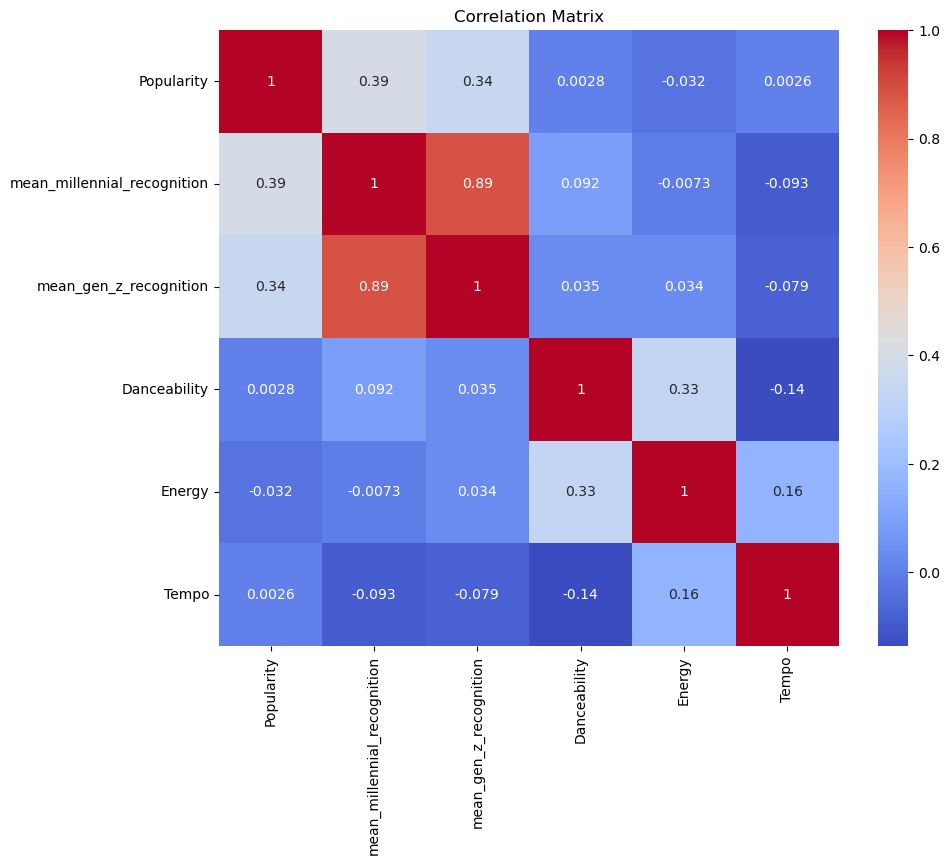

In [383]:
#Correlation Analysis
#This will help us to understand how various features like Tempo, Energy, Danceability, etc.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation analysis
numeric_columns = d3_corrected_sorted.select_dtypes(include='number')

# Generate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [651]:

# Spotify best hits for 90's track music 
import spotipy
import requests
import base64
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials

# Client ID and Client Secret
client_id = 'f054229c9b634cbcb2d15c39841b0565'
client_secret = '965028aa060f4aa6a2d1437dd051d6e0'
redirect_uri = 'https://90sgreatesthits'



# Access Token
def get_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode((client_id + ':' + client_secret).encode('ascii')).decode('ascii')
    auth_data = {
        'grant_type': 'client_credentials'
    }
    headers = {
        'Authorization': 'Basic ' + auth_header
    }
    response = requests.post(auth_url, headers=headers, data=auth_data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception('Could not authenticate, check your client credentials.')

token = get_token(client_id, client_secret)

# Function to search for hits in a specific country
def search_hits_90s_by_country(token, country, limit=20):
    search_url = "https://api.spotify.com/v1/search"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    query = {
        "q": "year:1990-1999",  
        "type": "track",
        "limit": limit,
        "market": country  # Use specific country code
    }
    response = requests.get(search_url, headers=headers, params=query)
    if response.status_code == 200:
        return response.json()['tracks']['items']
    else:
        raise Exception(f"Error fetching data: {response.status_code}")

# List of countries to query (you can combine countries from different continents)
countries = ['US', 'GB', 'DE', 'FR', 'JP']  # US, UK, Germany, France, Japan

# Dictionary to store unique tracks across countries
unique_tracks = {}

# Search for hits in each country and aggregate results
for country in countries:
    tracks = search_hits_90s_by_country(token, country)
    for track in tracks:
        track_id = track['id']
        if track_id not in unique_tracks:
            unique_tracks[track_id] = track
            
sorted_tracks = sorted(unique_tracks.values(), key=lambda x: x['popularity'], reverse=True)



# Utiliser une liste pour stocker les résultats lisibles
readable_tracks = []

# Parcourir les 10 premiers morceaux triés
for idx, track in enumerate(sorted_tracks[:10], start=1):
    readable_tracks.append(f"{idx}. {track['name']} by {track['artists'][0]['name']}")
  

# Convert the dictionary to a list and sort by Popularity
# df_splited_track = readable_tracks.split('.', 1)[1]
df_sorted_track = pd.DataFrame(readable_tracks)
df_sorted_track.rename(columns={0:'Track'}, inplace=True)

# Renommer les index
new_index = {i: f"{i+1}" for i in df_sorted_track.index}
df_sorted_track.rename(index=new_index, inplace=True)
df_sorted_track['Track'] = df_sorted_track['Track'].str.replace(r'^\d+\.\s*', '', regex=True)

df_sorted_track




,Track
1,Iris by The Goo Goo Dolls
2,Creep by Radiohead
3,Gangsta's Paradise by Coolio
4,Thunderstruck by AC/DC
5,I Want It That Way by Backstreet Boys
6,Linger by The Cranberries
7,Californication by Red Hot Chili Peppers
8,Everlong by Foo Fighters
9,No Scrubs by TLC
10,All The Small Things by blink-182


In [583]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour rechercher artiste et obtenir informations
def get_track_popularity(track_name, artist_name):
    result = sp.search(q=f'track:{track_name} artist:{artist_name}', type='track')
    if result['tracks']['items']:
        track = result['tracks']['items'][0]
        track_details = {
            'Name': track['name'],
            'Artist': track['artists'][0]['name'],
            'Popularity': track['popularity']}
        return track_details
    else:
        return "Not found"

top_10 = d3_corrected_sorted[:10].copy() 

# Ajouter une colonne 'popularity_2024'
top_10['Popularity 2024'] = None

for index, row in top_10.iterrows():
    track_name = row['Track']
    artist_name = row['Artist']
    track_details = get_track_popularity(track_name, artist_name)
    
    if track_details:
        top_10.loc[index, 'Popularity 2024'] = track_details['Popularity']
    else:
        top_10.loc[index, 'Popularity 2024'] = None

top_10



,Artist,Track,Duration,Popularity,mean_millennial_recognition,mean_gen_z_recognition,Danceability,Energy,Tempo,Popularity 2024
11,Barenaked Ladies,One Week,4:04,91,0.728785,0.256913,0.264,0.640,84.828,70
109,Mariah Carey,My All,2:17,89,0.325133,0.173403,0.504,0.308,113.950,66
27,Brandy,Have You Ever?,2:40,87,0.374130,0.165090,0.741,0.697,116.109,59
81,Keith Sweat,Nobody,3:00,86,0.127224,0.109736,0.358,0.284,99.796,62
80,Karyn White,Romantic,2:12,86,0.111855,0.161892,0.571,0.544,132.052,34
175,TLC,Creep,3:58,86,0.418879,0.155975,0.515,0.430,91.844,66
37,Cher,Believe,3:24,86,0.983381,0.899437,0.776,0.780,124.949,78
167,Smash Mouth,All Star,3:52,86,0.951832,0.923792,0.695,0.633,96.782,80
25,Brandy and Monica,The Boy Is Mine,2:53,86,0.597768,0.338540,0.795,0.630,97.998,0
114,Maxwell,Fortunate,2:20,85,0.076179,0.059514,0.640,0.663,132.770,59


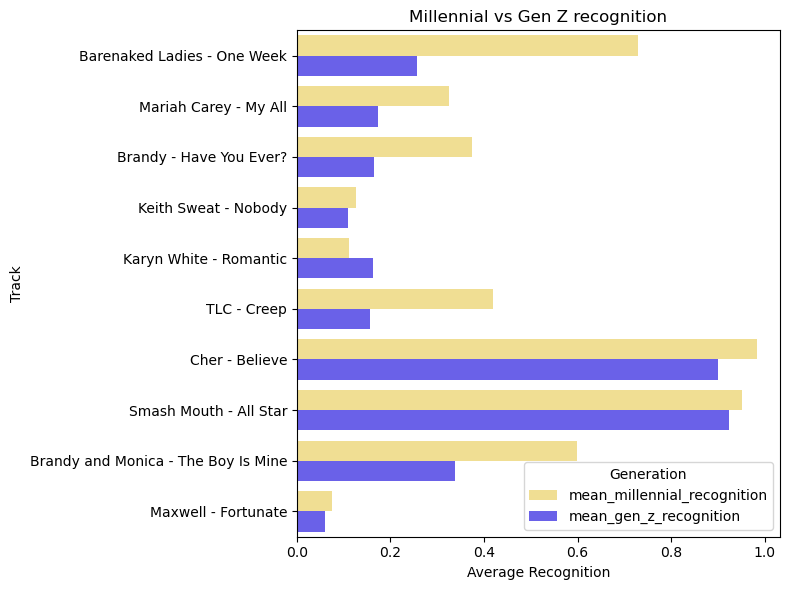

In [639]:
top_10_long = pd.melt(top_10, id_vars=['Artist', 'Track'], value_vars=['mean_millennial_recognition', 'mean_gen_z_recognition'],
                      var_name='Generation', value_name='Average Recognition')

# Create a new 'Label' column
top_10_long['Label'] = top_10_long.apply(lambda row: f"{row['Artist']} - {row['Track']}", axis=1)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Average Recognition', y='Label', hue='Generation', data=top_10_long, 
            palette=['#ffe883ff', '#574affff'])

# Add title and labels
plt.title('Millennial vs Gen Z recognition')
plt.xlabel('Average Recognition')
plt.ylabel('Track')

# Adjust the layout to make space for labels
plt.tight_layout()
plt.legend(title='Generation')
plt.show()

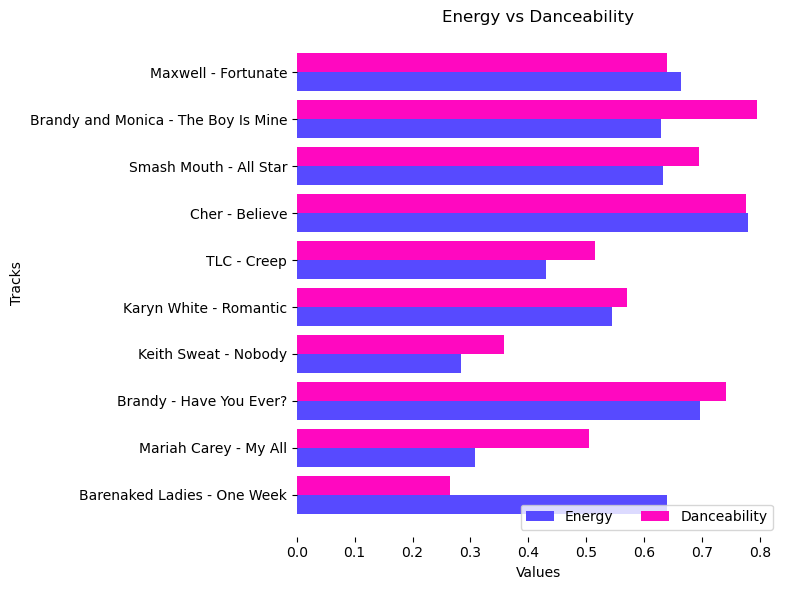

In [637]:
# Initialize the matplotlib figure with a custom size
f, ax = plt.subplots(figsize=(8, 6))

# Espacement pour les barres
bar_width = 0.4
indices = np.arange(len(top_10))

# Tracer les barres pour Energy
sns.set_color_codes("pastel")
energy_bars = ax.barh(indices, top_10['Energy'], bar_width, label="Energy", color="#574aff")

# Tracer les barres pour Danceability à côté
sns.set_color_codes("muted")
danceability_bars = ax.barh(indices + bar_width, top_10['Danceability'], bar_width, label="Danceability", color="#ff08c0")

# Ajouter les labels, titre et légende
ax.set_ylabel('Tracks')
ax.set_xlabel('Values')
ax.set_title('Energy vs Danceability')
ax.set_yticks(indices + bar_width / 2)
ax.set_yticklabels(top_10['Label'])
ax.legend(ncol=2, loc="lower right", frameon=True)

# Supprimer les bordures pour un look plus propre
sns.despine(left=True, bottom=True)

# Afficher le graphique
plt.tight_layout()
plt.show()

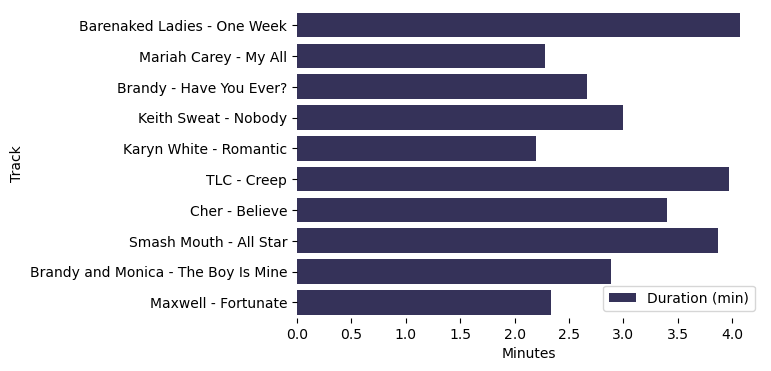

In [649]:
def convert_duration_to_minutes(duration):
    minutes, seconds = map(int, duration.split(':'))
    return minutes + seconds / 60

# Apply the conversion function to create a new column 'Duration_min'
top_10['Duration_min'] = top_10['Duration'].apply(convert_duration_to_minutes)

# Initialize the matplotlib figure with a custom size
f, ax = plt.subplots(figsize=(6, 4))  # Adjust the size as needed

# Create a new 'Label' column for combining Artist and Track names
top_10['Label'] = top_10.apply(lambda row: f"{row['Artist']} - {row['Track']}", axis=1)

# Plot Duration in minutes with a custom color
sns.barplot(x='Duration_min', y='Label', data=top_10, label='Duration (min)', color='#2f2b60ff')

# Add a legend and informative axis labels
ax.legend(loc="lower right", frameon=True)
ax.set(xlabel="Minutes", ylabel="Track")

# Remove the top and right spines for a cleaner look
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

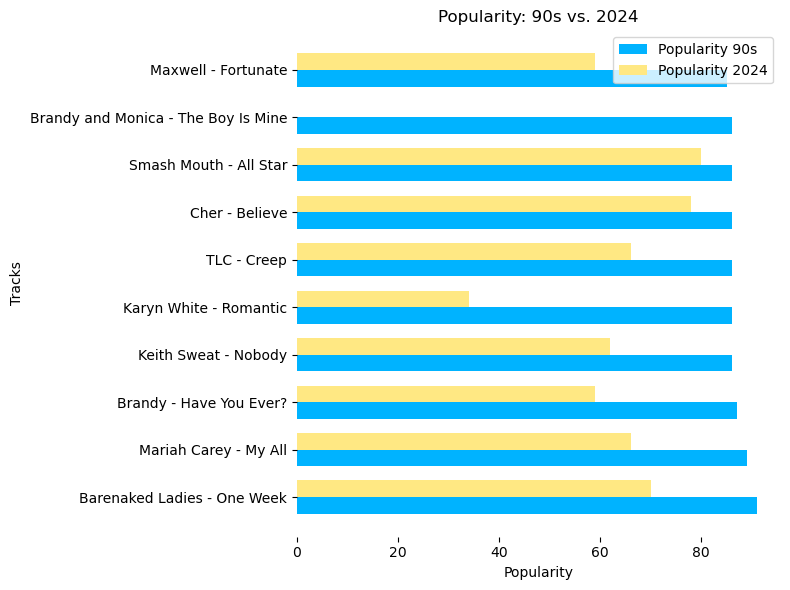

In [643]:
# Configuration de la figure
fig, ax = plt.subplots(figsize=(8, 6))

# Espacement pour les barres
bar_width = 0.35
indices = np.arange(len(top_10))

# Tracer les barres pour Popularity
popularity_bars = ax.barh(indices, top_10['Popularity'], bar_width, label='Popularity 90s', color='#00b3ff')

# Tracer les barres pour Popularity 2024 à côté
popularity_2024_bars = ax.barh(indices + bar_width, top_10['Popularity 2024'], bar_width, label='Popularity 2024', color='#ffe883')

# Ajouter les labels, titre et légende
ax.set_ylabel('Tracks')
ax.set_xlabel('Popularity')
ax.set_title('Popularity: 90s vs. 2024')
ax.set_yticks(indices + bar_width / 2)
ax.set_yticklabels(top_10['Label'])
ax.legend()

# Supprimer les bordures pour un look plus propre
sns.despine(left=True, bottom=True)

# Afficher le graphique
plt.tight_layout()
plt.show()